# Classification of Survived Passengers on Titanic Dataset
The 'titanic-train.csv' contains data of passenger details aboard the titanic, and whether they survived or not. We make a model which will predict their survival.

### Columns are:  
#### Input Features   
**Pclass** - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
**Name** - Name  
**Sex** - Sex  
**Age** - Age  
**SibSp** - Number of Siblings/Spouses Aboard  
**Parch** - Number of Parents/Children Aboard  
**Ticket** - Ticket Number  
**Fare** - Passenger Fare (British pound)  
**Cabin** - Cabin  
**Embarked** - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

#### Output Feature 
**Survived** - Survival (0 = No; 1 = Yes)

### Importing Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sb

%matplotlib inline

In [2]:
titanic = pd.read_csv("titanic-train.csv")
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Question 1
### Decide which variables are absolutely not required or relevant to the model. Drop those columns.

Since Name, Ticket, Fare, Cabin, Passenger ID and Point of Embarakation have absolutely no effect on a passenger's survival we can drop these columns from the titanic DataFrame.
Further when we plot a graph for SibSp v/s Survived and Parch v/s Survived, we observe that there is no relation between them. So we drop those columns from the titanic DataFrame.

In [3]:
titanic = titanic.drop(["Name","Fare","Ticket","Embarked","SibSp","Parch","Cabin","PassengerId"],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


## Question 2
### Plot a bar chart of the survived column

(array([0, 1]), <a list of 2 Text xticklabel objects>)

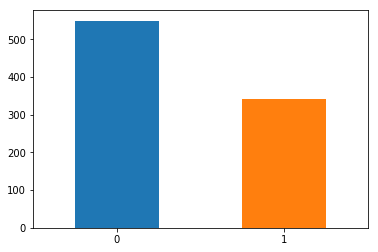

In [4]:
titanic["Survived"].value_counts().plot(kind = "bar")
plt.xticks(rotation=0)

## Question 3
### Plot a bar chart of the number of females who survived and not, and similarly for males

(array([0, 1]), <a list of 2 Text xticklabel objects>)

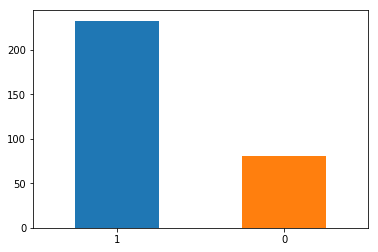

In [5]:
content = titanic[titanic["Sex"] == "female"]
content["Survived"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

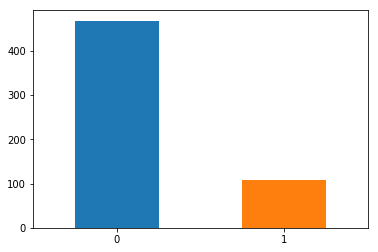

In [6]:
content = titanic[titanic["Sex"] == "male"]
content["Survived"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)

## Question 4
### Plot a stacked bar chart of survived or not based on PClass

c:\users\nihar n\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

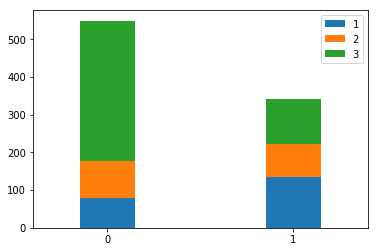

In [7]:
stack = pd.DataFrame(data=None, index = [0,1], columns = [1,2,3])
for i in range(1,4):
    ext = titanic[titanic["Pclass"]==i]
    stack[i].loc[0] = int(ext["Survived"][ext.Survived == 0].count())
    stack[i].loc[1] = int(ext["Survived"][ext.Survived == 1].count())
stack.plot.bar(stacked=True,width=0.3)
plt.xticks(rotation=0)

## Question 5
### Remove missing values. Fill missing values of Age using relation between Age and Pclass

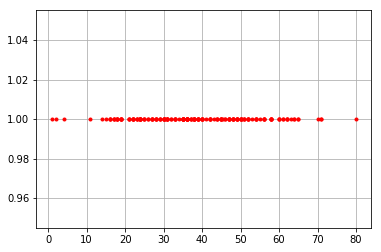

In [8]:
plt.plot(titanic["Age"][titanic.Pclass == 1],titanic["Pclass"][titanic.Pclass == 1],"r.")
plt.grid()

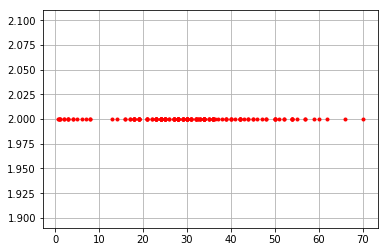

In [9]:
plt.plot(titanic["Age"][titanic.Pclass == 2],titanic["Pclass"][titanic.Pclass == 2],"r.")
plt.grid()

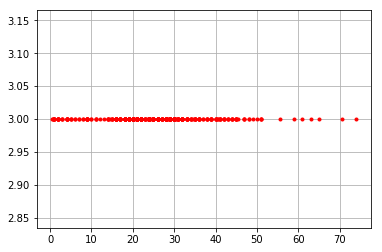

In [10]:
plt.plot(titanic["Age"][titanic.Pclass == 3],titanic["Pclass"][titanic.Pclass == 3],"r.")
plt.grid()

From the above 3 graphs, we can deduce that people aged 0-20 are most likely 2nd and 3rd class travellers. People aged between 20 and 50 can be travellers of any class. People aged 50 and above are mostly 1st and 2nd class travellers. Using this information we fill the NaN values of the dataset.

In [11]:
i=0
for everyval in titanic["Pclass"]:
    if (titanic["Age"].isnull().loc[i] == True) :
        if everyval==1 :
            age = random.randint(20,80)
        elif everyval==2 :
            age = random.randint(1,80)
        else:
            age = random.randint(1,80)
        titanic["Age"].loc[i] = age
    i=i+1

c:\users\nihar n\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Question 6
### Convert categorical values to numerical values

Converting the Sex column to Gender column with integer values such that Female = 0 and Male = 1

In [12]:
i=0
titanic["Gender"] = titanic["Survived"]
for everyval in titanic["Sex"]:
    if everyval == "male" :
        titanic["Gender"].loc[i] = 1
    else:
        titanic["Gender"].loc[i] = 0
    i = i+1
titanic = titanic.drop(["Sex"],axis=1)

c:\users\nihar n\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Question 7
### Plot a heatmap of the correlation between all columns

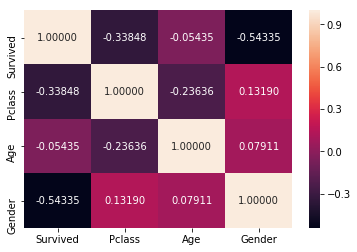

In [13]:
sb.heatmap(titanic.corr(), annot=True , fmt=".5f" )

From the heatmap we can observe that there is good inter-relation between the Gender and Survived column. There is also some inter-relation between the Passenger Class and survived column and, Passenger Class and Age column. Although there is some inter-relation, we cannot drop either of these columns from the dataset.

## Question 8
### Split dataset into training & testing 80:20 ratio using train_test_split function. Use a random state which will give an approximately equal number of survived and non survived rows in testing dataset

In [14]:
from sklearn.model_selection import train_test_split
minimum = 1000
state = 0
for i in range(10000):
    xtrain, xtest, ytrain, ytest = train_test_split(titanic[["Pclass","Age","Gender"]],titanic["Survived"],test_size=0.2,random_state = i)
    if (int(ytrain.value_counts().loc[0]) - int(ytrain.value_counts().loc[1])) < minimum :
        minimum = (int(ytrain.value_counts().loc[0]) - int(ytrain.value_counts().loc[1]))
        state = i
state

5242

So at state 5242 we obtain such values of survived and not survived that are closest to each other.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

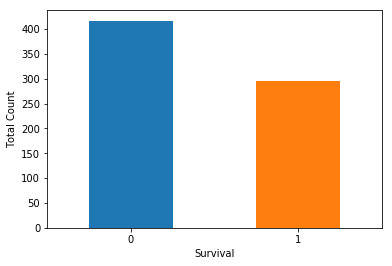

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(titanic[["Pclass","Age","Gender"]],titanic["Survived"],test_size=0.2,random_state = 5242)
ytrain.value_counts().plot(kind="bar")
plt.xlabel("Survival")
plt.ylabel("Total Count")
plt.xticks(rotation = 1)

### Perceptron Modelling

In [16]:
from sklearn.linear_model import Perceptron
classifier = Perceptron(max_iter=400)
survival = classifier.fit(xtrain,ytrain)

In [17]:
survival.predict(xtest)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [18]:
from sklearn import metrics
metrics.confusion_matrix(ytest,survival.predict(xtest))

array([[89, 43],
       [ 5, 42]], dtype=int64)

In [19]:
survival.score(xtrain,ytrain)

0.7556179775280899

## Decision Tree Modelling

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [21]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=6)
obtained_tree = dtree.fit(xtrain,ytrain)

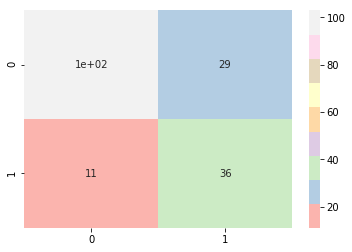

In [22]:
Predicted_Survival = obtained_tree.predict(xtest)
sb.heatmap(metrics.confusion_matrix(ytest,Predicted_Survival),annot=True,cmap='Pastel1',xticklabels=dtree.classes_,yticklabels=dtree.classes_)

In [23]:
obtained_tree.score(xtrain,ytrain)

0.8300561797752809

In [24]:
import os 
os.environ["PATH"]+=os.pathsep+'C:\Program Files (x86)\Graphviz2.38\bin'

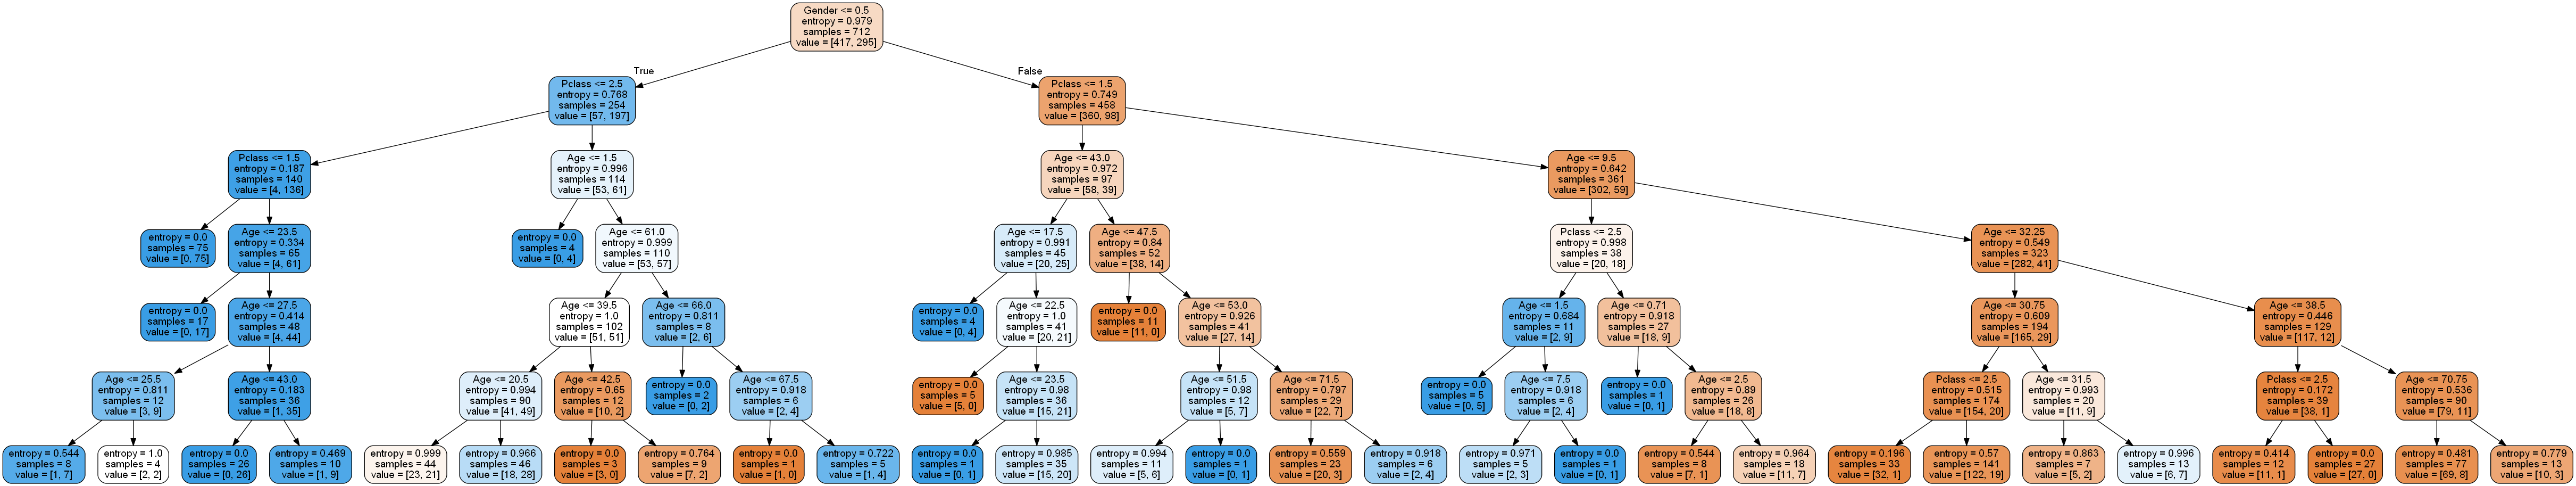

In [25]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

DecisionTreeImg=StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=['Pclass','Age','Gender'])

graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

## Which of the two models fairs better?
### The Decision Tree Model with a higher score fairs better than the Perceptron Model